In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

### Read the image files

We first read the image we want to align and the corresponding reference (template) image 

In [2]:
# Read the image files. 
img1_color= cv2.imread('images/align.png') # Image to be aligned. 
img2_color = cv2.imread('images/ref.png') # Reference image. 


In [3]:

# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

### Detect Features

Even though only 4 features are enough to define the homography, we still control the number of features using the max_features parameter

In [4]:
# Create ORB detector with 5000 features. 
max_features = 5000
orb_detector = cv2.ORB_create(max_features) 

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
# (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 

### Match features

In [5]:



# Match features between the two images. 
# We create a Brute Force matcher with 
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 

# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 

# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 

# Take the top good matches forward. 
GOOD_MATCH_PERCENT = 90
no_of_matches = len(matches) 
numGoodMatches = int(no_of_matches * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches] 


#Draw top matches
imMatches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
cv2.imwrite("matches_ORB.jpg", imMatches)

True

Notice, we have many incorrect matches and thefore we will need to use a robust method to calculate homography in the next step.

### Find the homography

In [6]:
print (np.array(kp1).shape)



(4964,)


In [7]:
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 

# Extract location of good matches
for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 

### Warping image

In [8]:
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
					homography, (width, height)) 

# Save the output. 
cv2.imwrite('output.jpg', transformed_img)

print("Estimated homography : \n",  homography)
  

Estimated homography : 
 [[ 1.39587087e+00  9.70637405e-02 -6.71254181e+02]
 [-1.95644499e-01  1.62958957e+00 -3.32516410e+02]
 [-9.02416937e-05  6.29723400e-05  1.00000000e+00]]


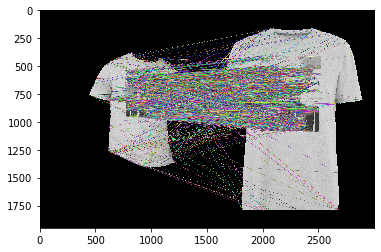

there are 2808 matches


In [9]:
#msg1 = 'using %s with lowe_ratio %.2f' % ("SIFT", lowe_ratio)
msg2 = 'there are %d matches' % (len(matches))

plt.imshow(imMatches),plt.show()

print (msg2)